<a href="https://colab.research.google.com/github/kushal-h/Deep-Learning-Implementations/blob/master/Self%20Organizing%20Maps/Mega_Case_Study_combining_SOM%2BANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mega Case Study - Making a hybrid Deep Learning Model

#Part 1 - SOM

##Install MiniSom Package

In [ ]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.9-cp37-none-any.whl size=8595 sha256=d615ba84b7c6e741c21491ad301bba326372ca9271ba5a9483e4d6753a907135
  Stored in directory: /root/.cache/pip/wheels/de/a0/08/5234d6b02b29c561f62b6c985e2eb7d480fb0b92359a8c74e4
Successfully built MiniSom


## Importing the libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [ ]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


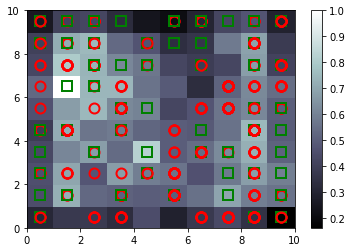

In [ ]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [ ]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,7)], mappings[(2,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [ ]:
frauds.shape

(23, 15)

##Printing the Fraunch Clients

In [ ]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15575438
15611973
15593178
15573077
15599152
15642001
15642063
15599535
15654760
15611794
15668679
15738487
15636521
15567834
15591035
15672912
15694677
15598614
15608804
15631267
15611189
15759387
15698522


#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [ ]:
customers = dataset.iloc[:, 1:].values

## Create Dependent Variable

In [ ]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

#Part 3 - ANN

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

##Import Tensorflow

In [ ]:
import tensorflow as tf
tf.__version__

'2.5.0'

## Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential()

##Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

## Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

## Compiling the ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [ ]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 1s 1ms/step - loss: 0.6534 - accuracy: 0.7609
Epoch 2/10
690/690 [==============================] - 1s 1ms/step - loss: 0.3445 - accuracy: 0.9652
Epoch 3/10
690/690 [==============================] - 1s 1ms/step - loss: 0.2439 - accuracy: 0.9667
Epoch 4/10
690/690 [==============================] - 1s 1ms/step - loss: 0.2000 - accuracy: 0.9667
Epoch 5/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1751 - accuracy: 0.9667
Epoch 6/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1593 - accuracy: 0.9667
Epoch 7/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1481 - accuracy: 0.9667
Epoch 8/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1391 - accuracy: 0.9667
Epoch 9/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1318 - accuracy: 0.9667
Epoch 10/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1250 - accuracy: 0.9667

## Predicting test set results

In [36]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1], y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [37]:
y_pred

array([[1.57997850e+07, 1.65581703e-04],
       [1.57901130e+07, 6.31093979e-04],
       [1.55858550e+07, 7.99834728e-04],
       ...,
       [1.57112990e+07, 2.70140707e-01],
       [1.56514600e+07, 2.97753096e-01],
       [1.58099090e+07, 3.62049222e-01]])

In [ ]:
y_pred

array([[1.57997850e+07, 1.65581703e-04],
       [1.57901130e+07, 6.31093979e-04],
       [1.55858550e+07, 7.99834728e-04],
       ...,
       [1.57112990e+07, 2.70140707e-01],
       [1.56514600e+07, 2.97753096e-01],
       [1.58099090e+07, 3.62049222e-01]])